In [6]:
print("Hello")


Hello


In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv("train.csv",header=None)


In [28]:
# df = pd.DataFrame(data)

numarrayxy = np.array(data.values)
xyshape = numarrayxy.shape

x = numarrayxy[:,:(xyshape[1]-1)]

xshape = x.shape
# print(xshape)
onex = np.ones((xshape[0],1))

y = numarrayxy[:,(xyshape[1]-1)]
print(y.shape)

x = np.hstack((x,onex))
#added extra column to x 
# xshape = x.shape
# print(xshape)


(30000,)


In [29]:
w = np.linalg.pinv(x).dot(y)
ycalc = x.dot(w)
trainerror = np.sum((ycalc - y)**2)
trainerror = trainerror/(np.sum(y**2))

print(trainerror)

print(y.shape)

0.6080463224138236
(30000,)


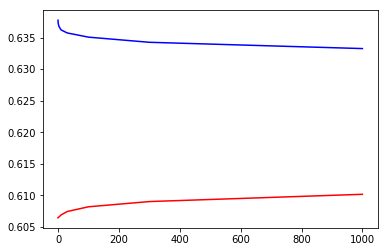

In [46]:
# plt.xlabel("xaxis")
# plt.ylabel("yaxis")
# plt.plot(x,y,'r')
# plt.plot(x,ycalc,'b')
# plt.show()

lamda = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
lamdaerrors = np.zeros((lamda.__len__(),2))
# lamda = []
n = x.shape[0]
n = int(n/10)
# y=y.T

train =[]
test=[]
for inde in range(lamda.__len__()):
    for i in range(10):
        train = x[0:i*n]
        trainy = y[0:i*n]
        j=lamda[inde]
        # print(trainy.shape)
        train = np.vstack((train,x[(i+1)*n:x.shape[0]]))
        # print(y[(i+1)*n:y.shape[0]].shape)
        trainy = np.hstack((trainy,y[(i+1)*n:y.shape[0]]))
        # print(trainy.shape)
        test = x[i*n:(i+1)*n]
        testy = y[i*n:(i+1)*n]
        ttranst = (train.T.dot(train))
        w = np.linalg.pinv(ttranst + np.identity(ttranst.shape[0])*j)
        w = w.dot(train.T.dot(trainy))
        ycalculated = train.dot(w)
        trainerror = np.sum((ycalculated - trainy)**2)
        trainerror = trainerror/(np.sum(trainy**2))
        # print(trainerror.shape)
        lamdaerrors[inde,0] += trainerror
        ycalculated = test.dot(w)
        trainerror = np.sum((ycalculated - testy)**2)
        trainerror = trainerror/(np.sum(testy**2))
        lamdaerrors[inde,1] += trainerror
        
    lamdaerrors[inde,0]/=10
    lamdaerrors[inde,1]/=10
plt.close()
plt.plot(lamda,lamdaerrors[:,0],'r')
plt.plot(lamda,lamdaerrors[:,1],'b')
plt.show()
        
        
    # print(train.shape)
    # print(test.shape)
    
    

In [ ]:

#def ksplit(dataa, k=10):
    # p = dataa.shape[0]
    # p= int(p/k)
    # for i in range(10):
    #     train = x[0:i*n]
    #     train = np.vstack((train,x[(i+1)*n:x.shape[0]]))
    #     test = x[i*n:(i+1)*n]
        
    
        
    
